In [1]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, Dense, \
                                    Conv2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as k
from tensorflow.image import resize

from sklearn.metrics import classification_report, confusion_matrix

from scipy.ndimage import rotate

import numpy as np
import matplotlib.pyplot as plt

In [2]:
len_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train, num_classes=len_classes)
y_test = to_categorical(y_test, num_classes=len_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
img_size = (28, 28, 1)


X_train = X_train.reshape(X_train.shape[0], *img_size)
X_test = X_test.reshape(X_test.shape[0], *img_size)

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

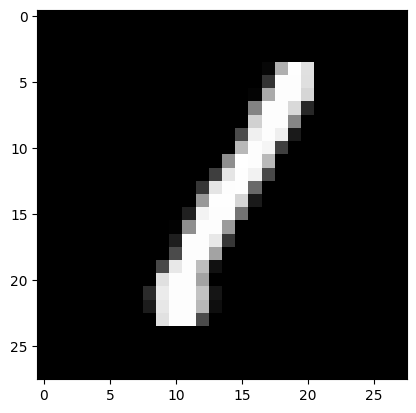

In [4]:
plt.imshow(X_train[59], cmap='gray', vmin=0, vmax=1)
plt.show()

In [5]:
def move_to_corner(small_image, corner, target_size=(28, 28, 1)):
  h, w, _ = small_image.shape  # Get height and width of small image

  # Create a grid filled with zeros, matching small image's data type
  new_image = np.zeros(target_size, dtype=np.float32)

  if corner == "ul":
    new_image[:h, :w] = small_image

  elif corner == "ur":
    new_image[:h, w:] = small_image

  elif corner == "bl":
    new_image[h:, :w] = small_image

  elif corner == "br":
    new_image[h:, w:] = small_image

  else:
    raise ValueError("Invalid corner value. Must be 'ul', 'ur', 'bl', or 'br'.")

  return new_image


def rotate_image(image, angle):
  rotated_image = rotate(image, angle, reshape=False)
  return rotated_image

In [6]:
np.random.seed(91)

corners = ("ul", "ur", "bl", "br")
new_imgs = []
new_labels = []

for i, img in enumerate(X_train):
  for corner in corners:
    img = resize(img, (14, 14))
    new_img = move_to_corner(img, corner)
    new_imgs.append(new_img)
    new_labels.append(y_train[i])

for i, img in enumerate(X_train):
  angle = np.random.randint(-30, 30)
  new_img = rotate_image(img, angle)
  new_imgs.append(new_img)
  new_labels.append(y_train[i])

In [7]:
X_train = np.concatenate((X_train, new_imgs))
y_train = np.concatenate((y_train, new_labels))

In [8]:
print(X_train.shape, y_train.shape)

(360000, 28, 28, 1) (360000, 10)


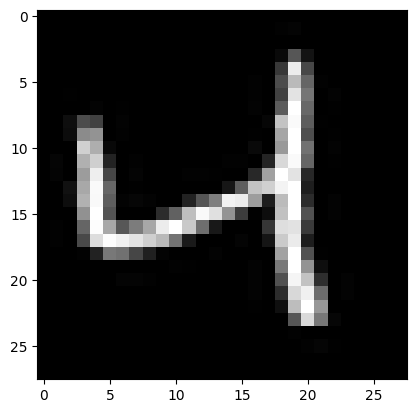

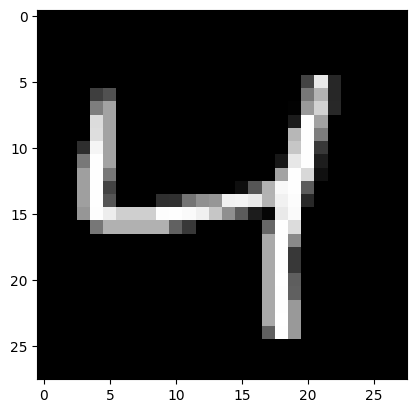

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
plt.imshow(X_train[300002], cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(X_train[2], cmap='gray', vmin=0, vmax=1)
plt.show()
print(f"Label: {y_train[300002]} {y_train[2]}")

In [19]:
def get_cnn(shape: tuple[int], len_classes: int):
  model = Sequential()

  model.add(Input(shape))
  model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(AveragePooling2D(pool_size=(1, 1)))
  model.add(Dropout(0.3))


  model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
  model.add(AveragePooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))


  model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
  model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))


  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(BatchNormalization())
  model.add(Dense(64, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(len_classes, activation="softmax"))

  return model


In [20]:
cnn_model = get_cnn(shape=img_size, len_classes=len_classes)
cnn_model.compile(optimizer="sgd",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

In [21]:
cnn_model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 201s 70ms/step - accuracy: 0.6512 - loss: 1.0514
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 193s 68ms/step - accuracy: 0.9634 - loss: 0.1313
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 201s 68ms/step - accuracy: 0.9740 - loss: 0.0886
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 190s 68ms/step - accuracy: 0.9808 - loss: 0.0673
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 203s 68ms/step - accuracy: 0.9829 - loss: 0.0589
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 202s 68ms/step - accuracy: 0.9854 - loss: 0.0506
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 201s 68ms/step - accuracy: 0.9871 - loss: 0.0442
Epoch 8/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 202s 68ms/step - accuracy: 0.9885 - loss: 0.0395
Epoch 9/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 202s 68ms/step - accuracy: 0.9897 - loss: 0.0354
Epoch 10/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 191s 68ms/step - accuracy: 0.9906 - loss: 0.0330


In [13]:
new_test_imgs = []
new_test_labels = []

for i, img in enumerate(X_test):
  for corner in corners:
    img = resize(img, (14, 14))
    new_img = move_to_corner(img, corner)
    new_test_imgs.append(new_img)
    new_test_labels.append(y_test[i])

for i, img in enumerate(X_test):
  angle = np.random.randint(-30, 30)
  new_img = rotate_image(img, angle)
  new_test_imgs.append(new_img)
  new_test_labels.append(y_test[i])

In [14]:
X_test = np.concatenate((X_test, new_test_imgs))
y_test = np.concatenate((y_test, new_test_labels))

In [22]:
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)


In [23]:
prediction = cnn_model.predict(X_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [24]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(prediction, axis=1)))
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(prediction, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5880
           1       1.00      1.00      1.00      6810
           2       0.99      0.99      0.99      6192
           3       0.99      1.00      0.99      6060
           4       0.98      1.00      0.99      5892
           5       0.99      0.99      0.99      5352
           6       0.99      0.99      0.99      5748
           7       0.99      0.99      0.99      6168
           8       0.99      0.99      0.99      5844
           9       1.00      0.98      0.99      6054

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

[[5855    0    0    0    0    0   18    6    1    0]
 [   0 6791    4    0    8    0    0    6    1    0]
 [   6    3 6139    5   17    0    3   13    6    0]
 [   0    3    1 6031    0   18    0    1    3    3]
 [   0    0    0    0 5882   

6 5


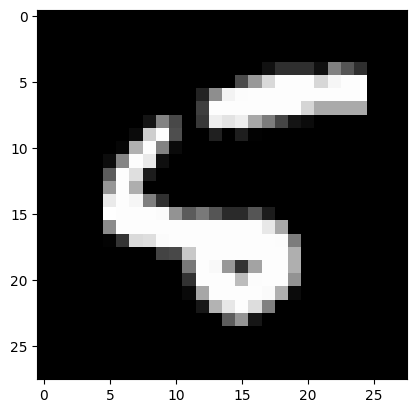

1


In [25]:
max_pred = np.argmax(prediction, axis=1)
max_test = np.argmax(y_test, axis=1)
c = 0

for i, (predicted_label, true_label) in enumerate(zip(max_pred, max_test)):
  if predicted_label != true_label:
    c += 1
    print(predicted_label, true_label)
    plt.imshow(X_test[i], cmap='gray', vmin=0, vmax=1)
    plt.show()

    break # mostrar un ejemplo de los que erró

print(c)

In [26]:
data = []
img = load_img("image1.png", target_size=(28, 28), color_mode="grayscale")
image_array = img_to_array(img) / 255.0
image_array = image_array.reshape(28, 28, 1)

data.append(image_array)

img = load_img("image2.png", target_size=(28, 28), color_mode="grayscale")
image_array = img_to_array(img) / 255.0
image_array = image_array.reshape(28, 28, 1)

data.append(image_array)

img = load_img("image3.png", target_size=(28, 28), color_mode="grayscale")
image_array = img_to_array(img) / 255.0
image_array = image_array.reshape(28, 28, 1)

data.append(image_array)

img = load_img("image4.png", target_size=(28, 28), color_mode="grayscale")
image_array = img_to_array(img) / 255.0
image_array = image_array.reshape(28, 28, 1)

data.append(image_array)

img = load_img("image5.png", target_size=(28, 28), color_mode="grayscale")
image_array = img_to_array(img) / 255.0
image_array = image_array.reshape(28, 28, 1)

data.append(image_array)

img = load_img("image6.png", target_size=(28, 28), color_mode="grayscale")
image_array = img_to_array(img) / 255.0
image_array = image_array.reshape(28, 28, 1)

data.append(image_array)

In [27]:
pred = cnn_model.predict(np.array(data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step


In [28]:
print(np.round(pred, 3))

[[0.    0.    0.    0.    0.996 0.    0.    0.    0.    0.003]
 [0.    0.    0.471 0.527 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.    0.    0.998 0.    0.    0.    0.    0.001]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.008 0.    0.233 0.706 0.    0.028 0.    0.018 0.003 0.003]]


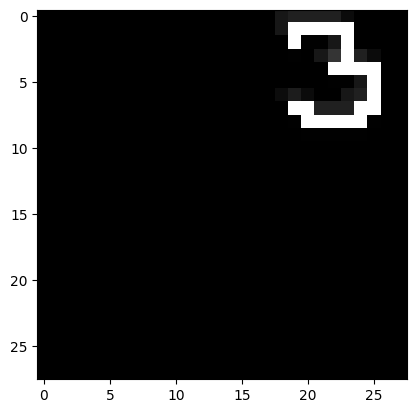

3


In [34]:
idx = 5

plt.imshow(data[idx], cmap="gray", vmin=0, vmax=1)
plt.show()
print(np.argmax(pred[idx]))

In [35]:
#import tensorflowjs as tfjs

#tfjs.converters.save_keras_model(cnn_model, "js-model")

cnn_model.save("py-model.keras")